# Plotting routine for the Sep22 Event - PSP

In [12]:
test = 'test'

In [13]:
%load_ext autoreload

%autoreload 2

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pickle as p

import datetime as datetime
from datetime import timedelta
import seaborn as sns
import pandas as pd
import os
#import copy as cp

import multiprocessing
import py3dcore_h4c as py3dcore_h4c

import py3dcore_h4c.fluxplot as fp

#plt.switch_backend('agg')


import warnings
warnings.filterwarnings('ignore')

import logging

logging.basicConfig(level=logging.INFO)
logging.getLogger("heliosat.spice").setLevel("WARNING")
logging.getLogger("heliosat.spacecraft").setLevel("WARNING")
#logging.getLogger("sunpy").setLevel("WARNING")
#logging.getLogger("py3dcore_h4c.fluxplot").setLevel("WARNING")

#print(sns.__version__)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### setting the times for py3DCORE_h4c

In [14]:
t_launch = datetime.datetime(2022, 9, 5, 16, tzinfo=datetime.timezone.utc) # 

t_s = datetime.datetime(2022, 9, 5, 19, tzinfo=datetime.timezone.utc) 
t_e = datetime.datetime(2022, 9, 6, 8, tzinfo=datetime.timezone.utc)

t_fit = [
        datetime.datetime(2022, 9, 5, 20, 30, tzinfo=datetime.timezone.utc),
        datetime.datetime(2022, 9, 5, 22, tzinfo=datetime.timezone.utc),
        datetime.datetime(2022, 9, 6, 2, 30, tzinfo=datetime.timezone.utc),
        datetime.datetime(2022, 9, 8, 4, tzinfo=datetime.timezone.utc)
     ]


#t_fit = fp.equal_t_creator(start = start, n = 4, delta = 6)

#####2022 Sep 5: 3 solar radii at 17 UT (COR2 & LASCO FoV appearance)
# 2022 Sep 5: 15 solar radii at 18:45 UT (PSP)

#### loading the pickle files

In [15]:
t_fit

[datetime.datetime(2022, 9, 5, 20, 30, tzinfo=datetime.timezone.utc),
 datetime.datetime(2022, 9, 5, 22, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2022, 9, 6, 2, 30, tzinfo=datetime.timezone.utc),
 datetime.datetime(2022, 9, 8, 4, 0, tzinfo=datetime.timezone.utc)]

In [16]:
path = 'output/psp05092022_heeq_512_5/'

filepath = fp.loadpickle(path, number = -1)

In [17]:
filepath[:-7]

'output/psp05092022_heeq_512_5/06'

#### extracting parameters

In [18]:
res, allres, ind, meanparams = fp.get_params(filepath, give_mineps=True)

INFO:py3dcore_h4c.fluxplot:Retrieved the following parameters for the run with minimum epsilon:
INFO:py3dcore_h4c.fluxplot: --lon:  135.54
INFO:py3dcore_h4c.fluxplot: --lat:  -23.29
INFO:py3dcore_h4c.fluxplot: --inc:  145.37
INFO:py3dcore_h4c.fluxplot: --diameter 1 AU:  0.79
INFO:py3dcore_h4c.fluxplot: --aspect ratio:  2.60
INFO:py3dcore_h4c.fluxplot: --launch radius:  5.23
INFO:py3dcore_h4c.fluxplot: --launch speed:  1120.07
INFO:py3dcore_h4c.fluxplot: --t factor:  -149.05
INFO:py3dcore_h4c.fluxplot: --expansion rate:  1.14
INFO:py3dcore_h4c.fluxplot: --magnetic field decay rate:  1.64
INFO:py3dcore_h4c.fluxplot: --magnetic field 1 AU:  9.56
INFO:py3dcore_h4c.fluxplot: --drag coefficient:  2.64
INFO:py3dcore_h4c.fluxplot: --sw background speed:  229.03


In [19]:
print(allres)

[[  0.        124.82481   -20.596872  ...  11.075246    3.7516189
   92.92597  ]
 [  0.        117.50879    -1.4099177 ...   9.647931    2.6231332
   86.22299  ]
 [  0.        135.92796   -16.09367   ...   8.349378    3.5809696
  112.02481  ]
 ...
 [  0.        131.52666   -20.143152  ...  14.170672    2.0433114
  101.33471  ]
 [  0.        137.76031   -13.27592   ...  15.778333    2.6276765
  178.91235  ]
 [  0.        134.95818   -13.970191  ...  12.928316    2.686954
   52.79174  ]]


In [20]:
out = fp.get_ensemble_stats(filepath)

In [21]:
out.describe()

,lon,lat,inc,D1AU,delta,launch radius,launch speed,t factor,B1AU,gamma,vsw
count,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000
mean,132.252335,-17.101986,129.718826,0.754005,2.562976,9.469884,760.423096,-189.411728,12.628202,2.707991,138.965088
std,8.027050,9.305882,12.392298,0.035486,1.127488,2.204415,458.497101,40.087063,3.528969,0.864442,73.627357
min,105.956352,-38.253712,85.670746,0.575141,1.000793,5.008749,104.845688,-249.762329,5.119706,0.298783,50.001503
25%,126.843733,-23.558740,121.375925,0.733476,1.622634,7.788324,378.982544,-221.797070,10.144301,2.116962,85.315685
50%,132.753685,-17.982158,130.320908,0.762465,2.398995,9.462597,639.251709,-196.123299,12.178494,2.844143,121.337177
75%,138.193466,-11.747256,138.494194,0.780979,3.295994,11.141426,1098.809174,-162.529263,14.654571,3.388969,173.618710
max,154.039413,23.465330,165.074783,0.799904,6.571028,13.940350,1980.603516,-50.094635,25.786158,3.998597,499.811127


#### loading and plotting the fitting results

INFO:py3dcore_h4c.fluxplot:No iparams_arr given, using parameters for run with minimum eps.
INFO:py3dcore_h4c.fluxplot:Plotting run with mean parameters.
INFO:py3dcore_h4c.fitter.base:Using custom datafile: psp_2022sep.p


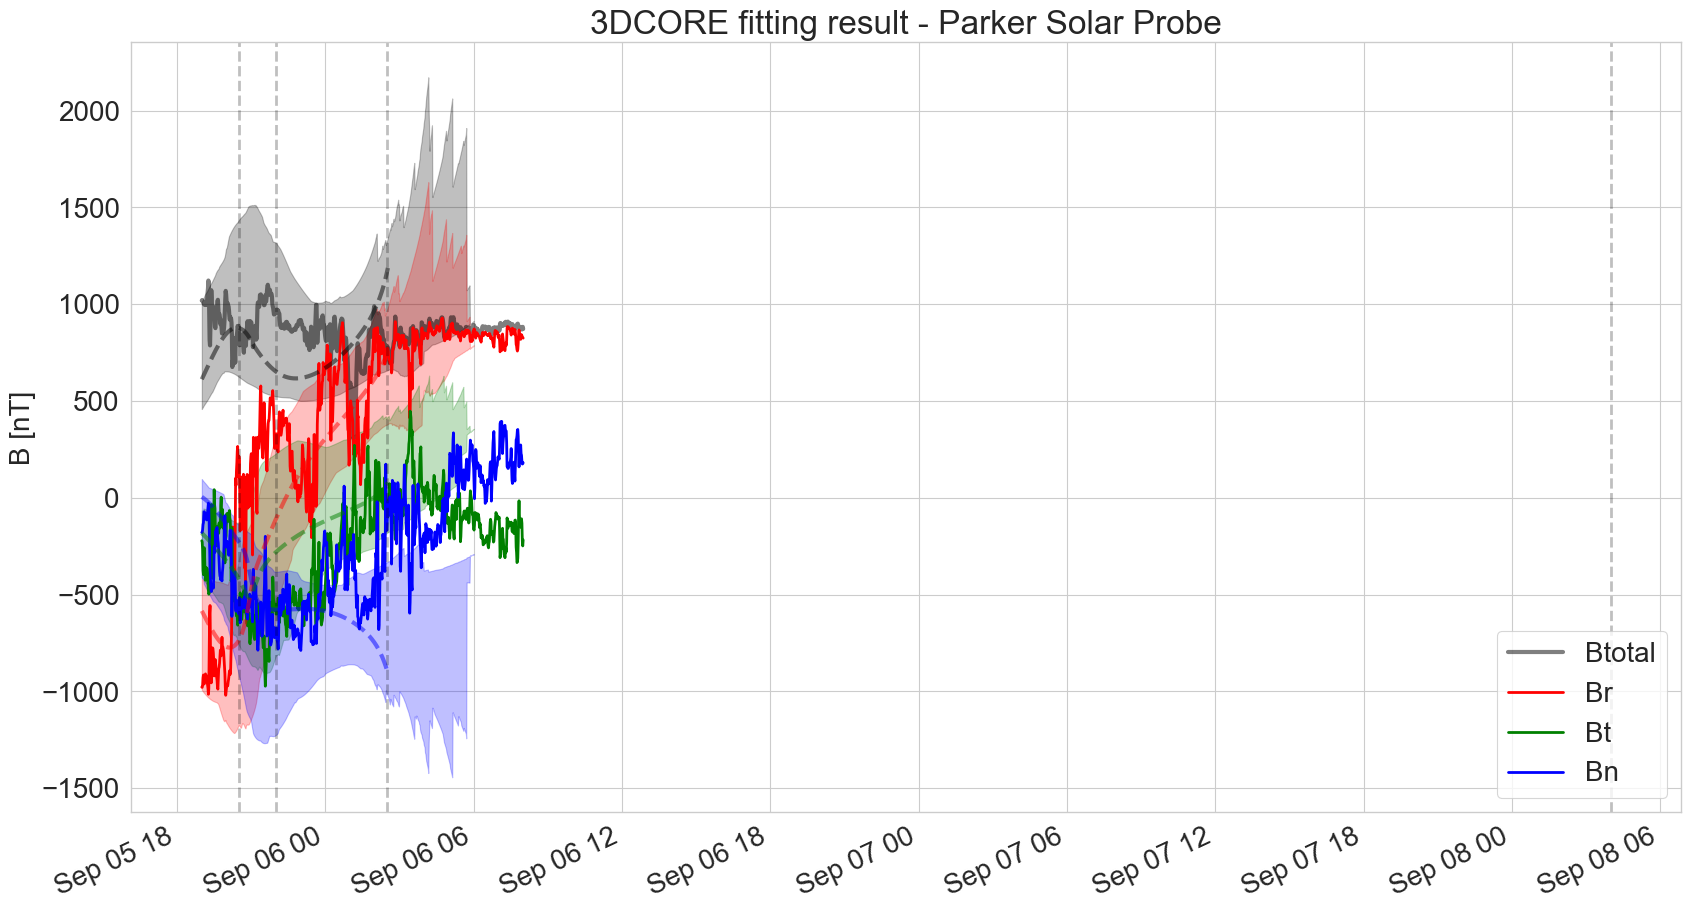

In [46]:
fp.fullinsitu(observer='PSP', t_fit=t_fit, start=t_s, end=t_e, filepath=filepath, 
              custom_data='psp_2022sep.p', best=True, ensemble=True, mean=True, save_fig=True, legend=True, fixed=None)

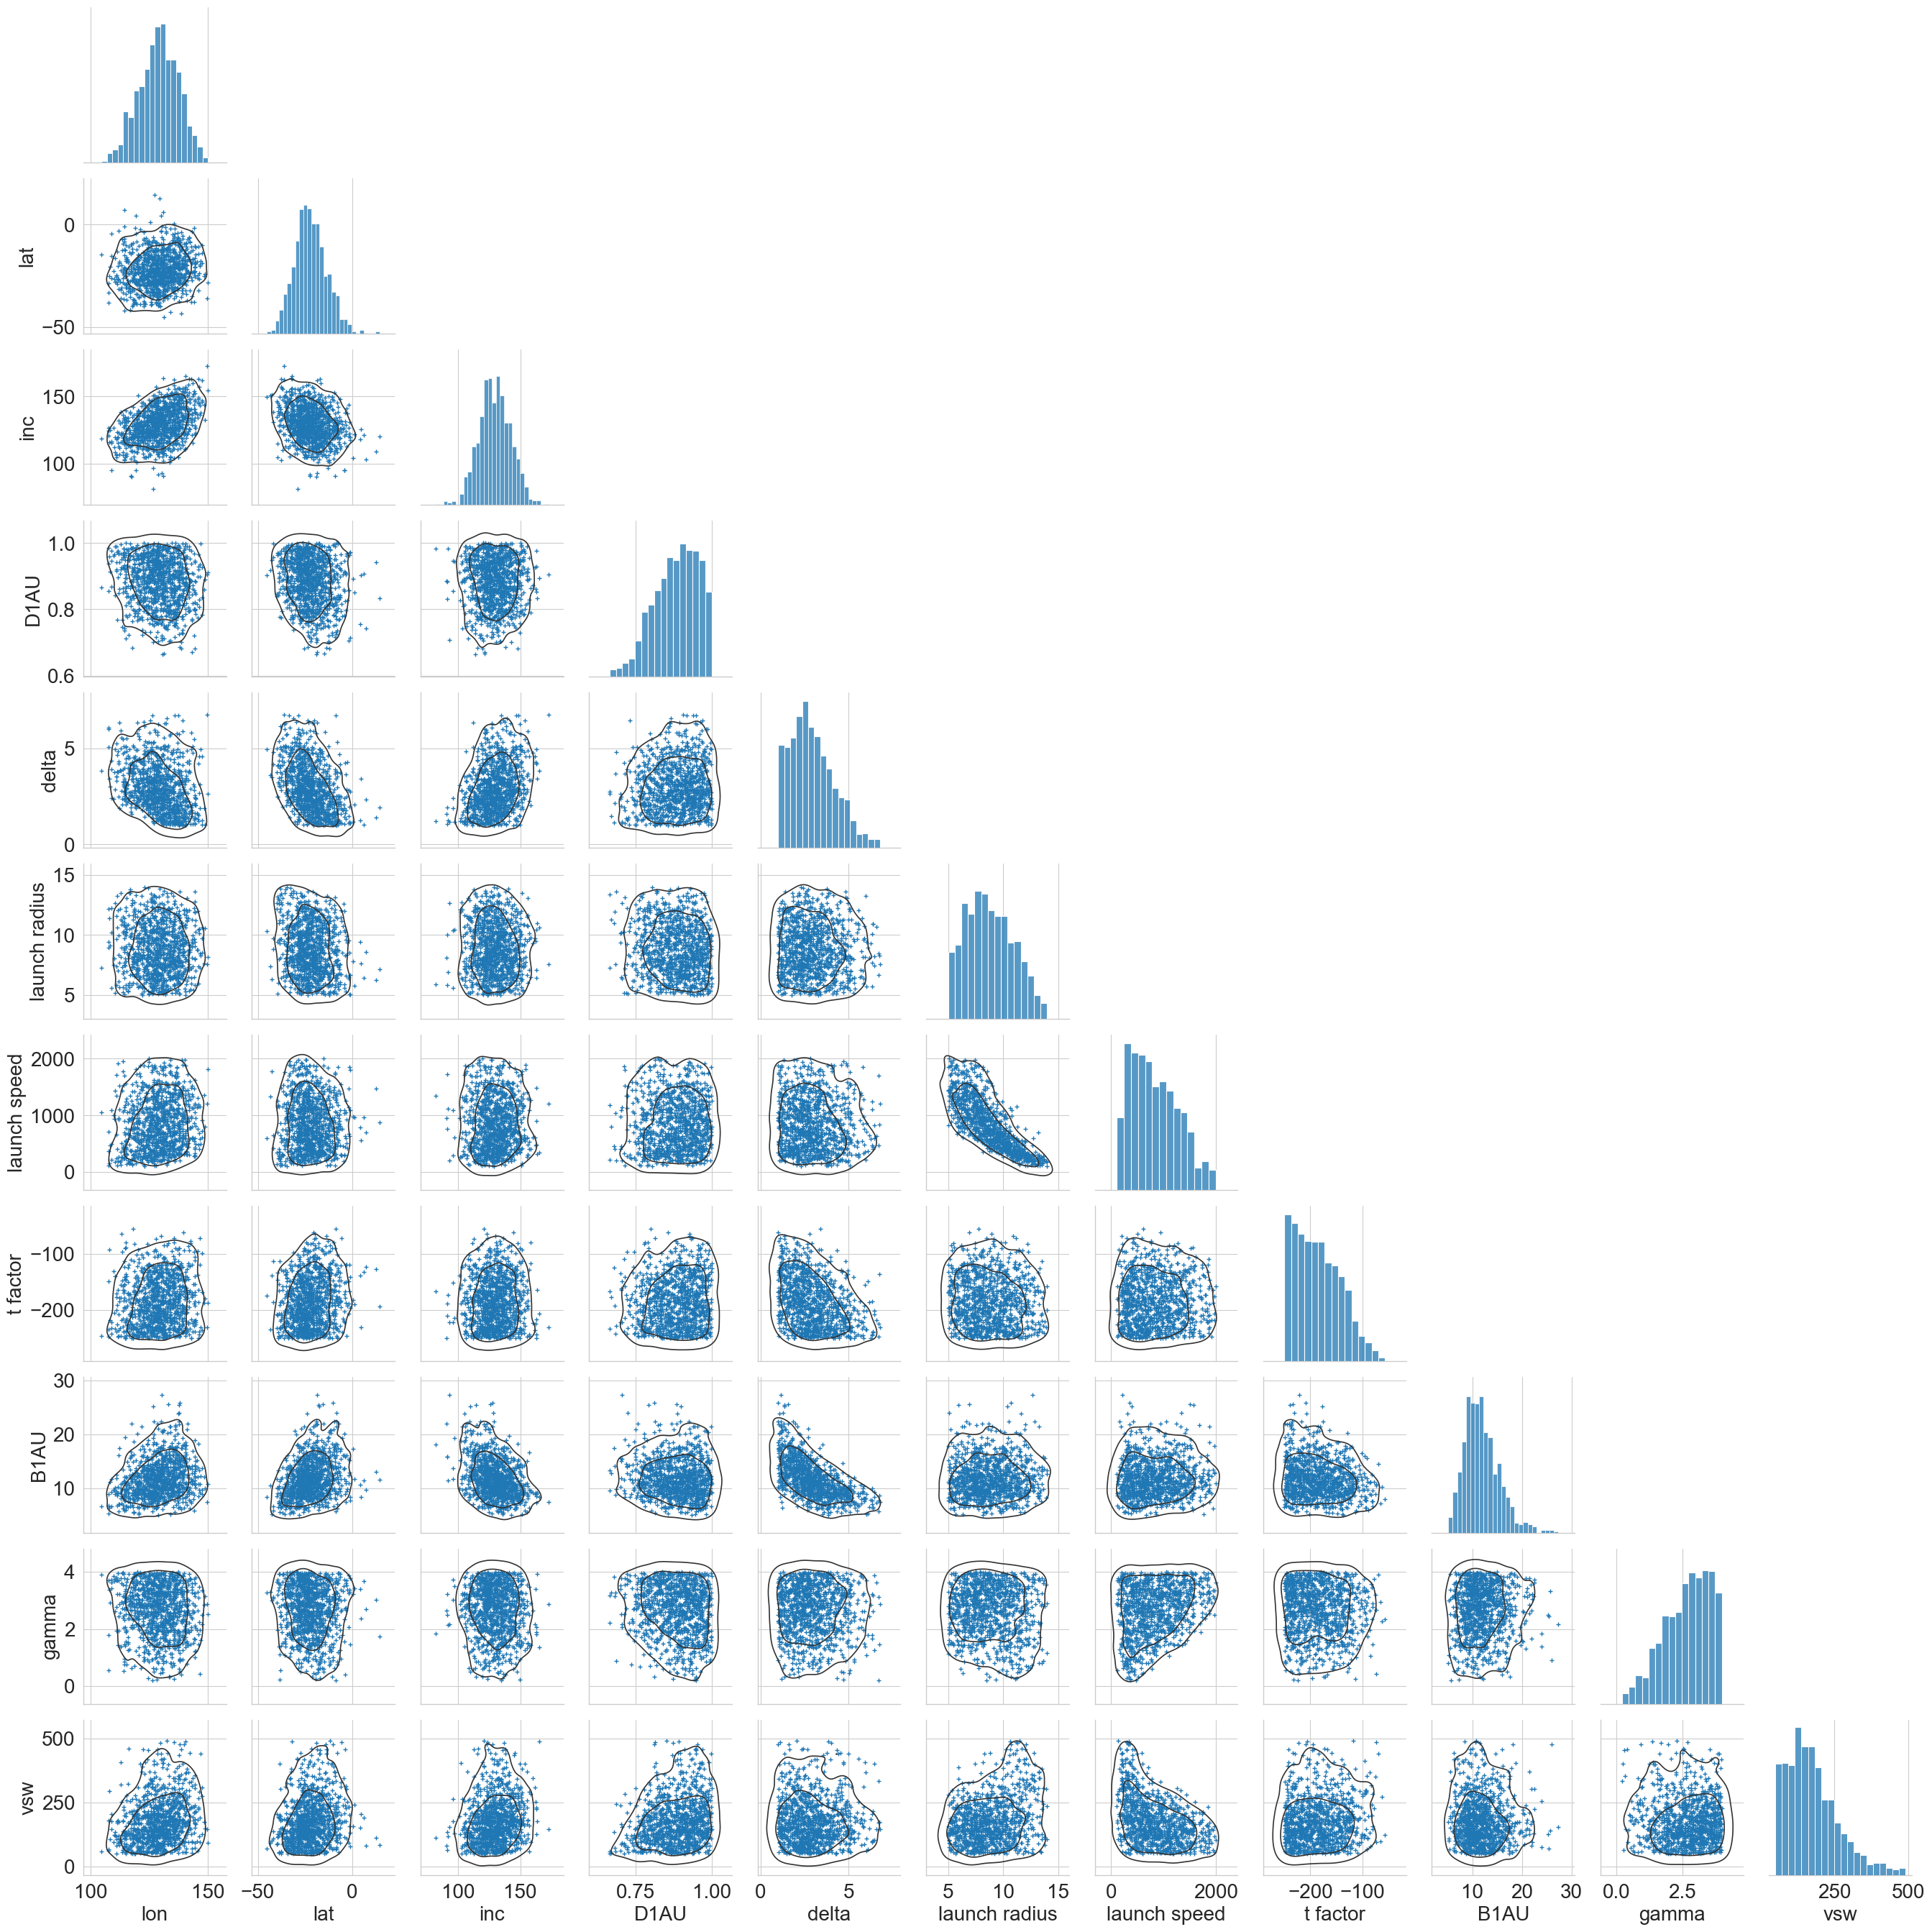

In [12]:
fp.scatterparams(filepath)

In [13]:
print(out['lon'].mean())
print(out['lon'].std())
print(out['launch radius'].std())
print(out['launch speed'].std())

129.77652
7.8965845
1.4175329
479.1078


#### Plotting the fluxrope and spacecraft positions

INFO:sunpy:Obtained JPL HORIZONS location for Parker Solar Probe (spacecraft)


INFO: Obtained JPL HORIZONS location for Parker Solar Probe (spacecraft) [sunpy.coordinates.ephemeris]


INFO:py3dcore_h4c.fluxplot:Indices of date: 4079
INFO:py3dcore_h4c.fluxplot:Parker Solar Probe - r: 0.067216, lon: 128.088180, lat: -2.258282, 
INFO:sunpy:Obtained JPL HORIZONS location for Parker Solar Probe (spacecraft)


INFO: Obtained JPL HORIZONS location for Parker Solar Probe (spacecraft) [sunpy.coordinates.ephemeris]


INFO:py3dcore_h4c.fluxplot:Indices of date: 2639
INFO:py3dcore_h4c.fluxplot:Parker Solar Probe - r: 0.067216, lon: 128.088180, lat: -2.258282, 


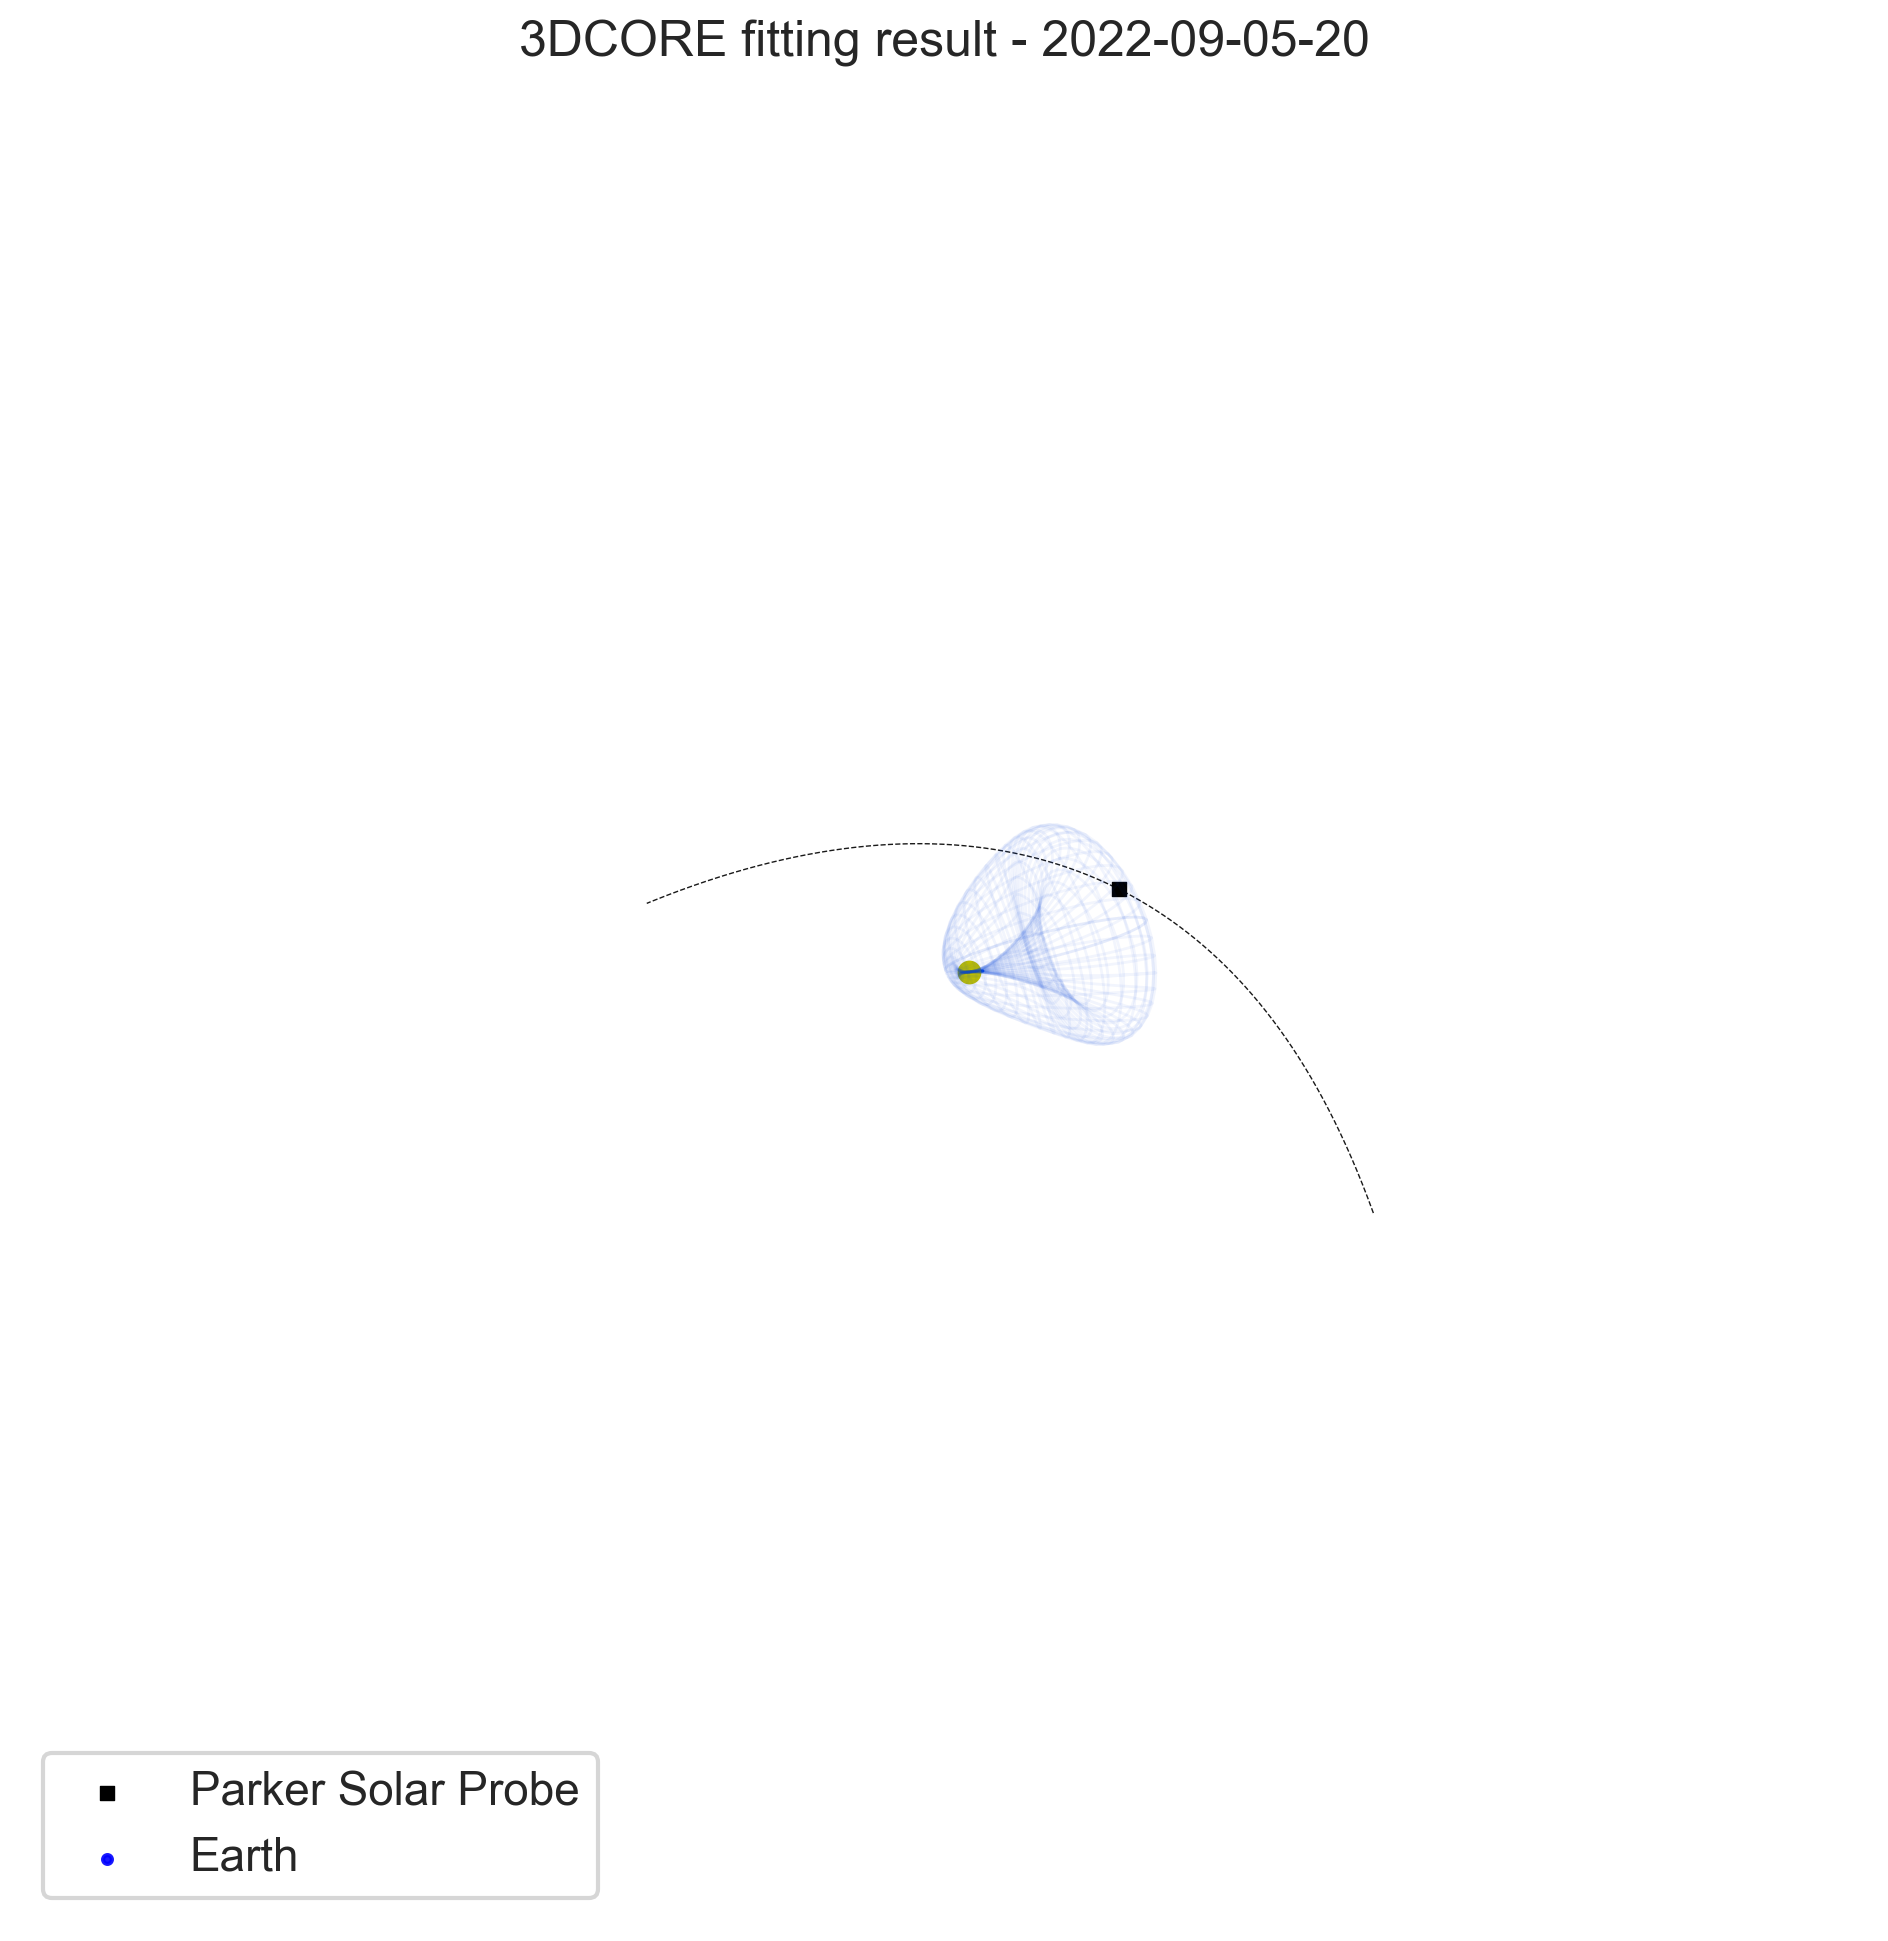

In [14]:
#measurement times 
#tm0 =  t_launch + datetime.timedelta(days=1.5)
tm0 =  datetime.datetime(2022, 9, 5, 16)
tm1 =  datetime.datetime(2022, 9, 5, 20, 30)
# tm1 = t_launch + datetime.timedelta(days=1.7)
tm2 =  t_launch + datetime.timedelta(days=3.5)

fig = fp.full3d(spacecraftlist=['psp'], t = tm1, filepath = filepath, custom_data='psp_sep2022.p') #, planetlist =['Earth']

### make fluxrope 3d movie

In [15]:
def make_frame(k):
    #tm0 = datetime.datetime(2022, 9, 5, 19)
    tm0 =  datetime.datetime(2022, 9, 5, 16)
    t = tm0 + k*datetime.timedelta(hours=1)
    
    fig = fp.full3d(spacecraftlist=['psp'], planetlist =['Earth'],
              t = t, filepath = filepath, save_fig = False)
    frmstr = '%05i' % (k) 
    plt.savefig(filepath[:-7] + 'movie_3d/'+frmstr+'.jpg',dpi=200)  
    return fig
    

In [ ]:
inn=[i for i in range(50)]


mpool = multiprocessing.Pool(processes=5)
mpool.map(make_frame, inn[0:49])
mpool.close()
mpool.join()

print('done 1/4')

#mpool = multiprocessing.Pool(processes=5)
#mpool.map(make_frame, inn[20:60])
#mpool.close()
#mpool.join()

#print('done 2/4')

#mpool = multiprocessing.Pool(processes=5)
#mpool.map(make_frame, inn[40:60])
#mpool.close()
#mpool.join()

#print('done 3/4')

#mpool = multiprocessing.Pool(processes=5)
#mpool.map(make_frame, inn[40:80])
#mpool.close()
#mpool.join()

#print('done 4/4')

Process SpawnPoolWorker-1:
Traceback (most recent call last):
  File "/Users/hannahruedisser/miniforge3/envs/3dcorenv/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/Users/hannahruedisser/miniforge3/envs/3dcorenv/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/hannahruedisser/miniforge3/envs/3dcorenv/lib/python3.10/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/hannahruedisser/miniforge3/envs/3dcorenv/lib/python3.10/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'make_frame' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2:
Traceback (most recent call last):
  File "/Users/hannahruedisser/miniforge3/envs/3dcorenv/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/Users/hannahruedisser/miniforge3/envs/3dcorenv/lib/pyth

In [ ]:
os.system('ffmpeg -r 25 -i '+filepath[:-7]+'movie_3d/%05d.jpg -b 5000k -r 25 '+filepath[:-7]+'movie_3d/full_3d_movie.mp4 -y -loglevel quiet')

### plot fluxrope 3d multiview

In [ ]:
#measurement times 
#tm0 =  t_launch + datetime.timedelta(days=1.5)
tm0 =  datetime.datetime(2022, 9, 5, 16)
tm1 =  datetime.datetime(2022, 9, 5, 20, 30)
tm2 =  t_launch + datetime.timedelta(days=3.5)

fig = fp.full3d_multiview(t_launch = t_launch, filepath=filepath)

### make fluxrope 3d multiview movie

In [ ]:
def make_frame2(k):
    tm0 = datetime.datetime(2022, 9, 5, 16)
    t = tm0 + k*datetime.timedelta(hours=1)
    frametime = k
    
    fig = fp.full3d_multiview_movie(t_launch = tm0, t = t, filepath=filepath,
                                    frametime=k)
    frmstr = '%05i' % (k) 
    plt.savefig(filepath[:-7] + 'movie_3d_multiview/'+frmstr+'.jpg',dpi=200)  
    return fig

In [ ]:
inn=[i for i in range(50)]


mpool = multiprocessing.Pool(processes=5)
mpool.map(make_frame2, inn[0:49])
mpool.close()
mpool.join()

print('done 1/4')

#mpool = multiprocessing.Pool(processes=5)
#mpool.map(make_frame2, inn[20:40])
#mpool.close()
#mpool.join()

#print('done 2/4')

#mpool = multiprocessing.Pool(processes=5)
#mpool.map(make_frame2, inn[40:60])
#mpool.close()
#mpool.join()

#print('done 3/4')

#mpool = multiprocessing.Pool(processes=5)
#mpool.map(make_frame2, inn[40:80])
#mpool.close()
#mpool.join()

#print('done 4/4')

In [ ]:
os.system('ffmpeg -r 25 -i '+filepath[:-7]+'movie_3d_multiview/%05d.jpg -b 5000k -r 25 '+filepath[:-7]+'movie_3d/full_3d_multiview_movie.mp4 -y -loglevel quiet')

# Used for Debug

In [ ]:
TP_A =  t_launch + datetime.timedelta(hours=2)
TP_B =  t_launch + datetime.timedelta(hours=40)


C_A = "xkcd:red"
C_B = "xkcd:blue"
    
sns.set_style('whitegrid')

fig = plt.figure(figsize=(15, 11),dpi=100)

ax1 = plt.subplot2grid((2, 3), (0, 0),rowspan=2,colspan=2,projection='3d')  
ax2 = plt.subplot2grid((2, 3), (0, 2),projection='3d')  
ax3 = plt.subplot2grid((2, 3), (1, 2),projection='3d')  

model_obj = fp.returnmodel(filepath)


fp.plot_configure(ax1, view_azim=150, view_elev=25, view_radius=.2,light_source=True) #view_radius=.08

fp.plot_3dcore(ax1, model_obj, TP_A, color=C_A,light_source = True)
fp.plot_3dcore(ax1, model_obj, TP_B, color=C_B,light_source = True)

fp.plot_shift(ax1,0.31,-0.25,0.0,-0.2)


fp.plot_configure(ax2, view_azim=165-90, view_elev=90, view_radius=.08,light_source=True)
    
fp.plot_3dcore(ax2, model_obj, TP_A, color=C_A,light_source = True)
fp.plot_3dcore(ax2, model_obj, TP_B, color=C_B,light_source = True)

fp.plot_shift(ax2,0.26,-0.41,0.08,0.0)



fp.plot_configure(ax3, view_azim=65, view_elev=-5, view_radius=.01,light_source=True)
    
fp.plot_3dcore(ax3, model_obj, TP_A, color=C_A,light_source = True)
fp.plot_3dcore(ax3, model_obj, TP_B, color=C_B,light_source = True)

fp.plot_shift(ax3,0.26,-0.41,0.08,0.0)

